In [122]:
import matplotlib.pyplot as plt
import osmnx as ox

ox.citation()

@article{boeing_osmnx_2017,
    title = {{OSMnx}: {New} {Methods} for {Acquiring}, {Constructing}, {Analyzing}, and {Visualizing} {Complex} {Street} {Networks}},
    volume = {65},
    doi = {10.1016/j.compenvurbsys.2017.05.004},
    number = {126-139},
    journal = {Computers, Environment and Urban Systems},
    author = {Boeing, Geoff},
    year = {2017},
    pages = {126--139}
}


# Kensington

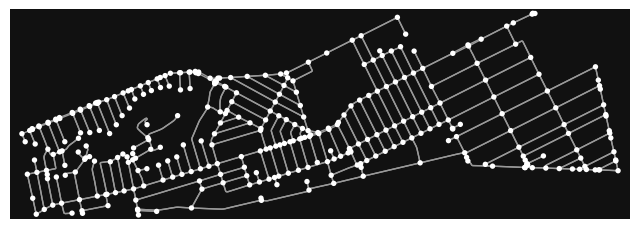

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [75]:
kensington_graph = ox.graph_from_place('Kensington, City of Johannesburg, South Africa', network_type="drive")
ox.plot_graph(kensington_graph)

In [76]:
kensington_gdf = ox.graph_to_gdfs(kensington_graph, nodes=False)
print(len(kensington_gdf))
kensington_gdf.head()

872


osmid lanes  ref  \
u        v          key                                      
26417799 305730224  0                  87361206     4  R24   
         288933063  0                  87361206     4  R24   
         288933328  0                  26372461     2  NaN   
26417800 7151979247 0                  23060545     2  NaN   
         7164510312 0    [765781197, 767333415]     2  R24   

                                          name      highway maxspeed  oneway  \
u        v          key                                                        
26417799 305730224  0    Albertina Sisulu Road      primary       60   False   
         288933063  0    Albertina Sisulu Road      primary       60   False   
         288933328  0             Cavan Street  residential      NaN   False   
26417800 7151979247 0               1st Street  residential      NaN   False   
         7164510312 0    Albertina Sisulu Road      primary       60    True   

                        reversed  length  \
u        v          key                    
26417799 305730224  0      False  45.163   
         288933063  0       True  40.507   
         288933328  0       True  88.156   
26417800 7151979247 0      False   7.771   
         7164510312 0      False  31.393   

                                                                  geometry  
u        v          key                                                     
26417799 305730224  0    LINESTRING (28.08472 -26.19144, 28.08513 -26.1...  
         288933063  0    LINESTRING (28.08472 -26.19144, 28.08434 -26.1...  
         288933328  0    LINESTRING (28.08472 -26.19144, 28.08491 -26.1...  
26417800 7151979247 0    LINESTRING (28.07650 -26.19444, 28.07647 -26.1...  
         7164510312 0    LINESTRING (28.07650 -26.19444, 28.07638 -26.1...

In [4]:
%cd ..
%load_ext autoreload
%autoreload 2

C:\Users\emily\Documents\repos\south-africa-street-history-mapping


C:\Users\emily\AppData\Local\pypoetry\Cache\virtualenvs\south-africa-street-history-mapping-9G5Ofpoj-py3.10\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [77]:
from utils.lookup_origin import map_street_to_origin

kensington_gdf = kensington_gdf.apply(lambda x: map_street_to_origin(x), axis=1)
kensington_gdf

geometry  \
u           v           key                                                      
26417799    305730224   0    LINESTRING (28.08472 -26.19144, 28.08513 -26.1...   
            288933063   0    LINESTRING (28.08472 -26.19144, 28.08434 -26.1...   
            288933328   0    LINESTRING (28.08472 -26.19144, 28.08491 -26.1...   
26417800    7151979247  0    LINESTRING (28.07650 -26.19444, 28.07647 -26.1...   
            7164510312  0    LINESTRING (28.07650 -26.19444, 28.07638 -26.1...   
...                                                                        ...   
9787389627  9787389622  0    LINESTRING (28.10714 -26.19513, 28.10727 -26.1...   
10956601309 10956601310 0    LINESTRING (28.09764 -26.19670, 28.09791 -26.1...   
10956601310 390371867   0    LINESTRING (28.09791 -26.19727, 28.09842 -26.1...   
            10956601309 0    LINESTRING (28.09791 -26.19727, 28.09764 -26.1...   
            390036534   0    LINESTRING (28.09791 -26.19727, 28.09749 -26.1...   

                                 highway lanes  length maxspeed  \
u           v           key                                       
26417799    305730224   0        primary     4  45.163       60   
            288933063   0        primary     4  40.507       60   
            288933328   0    residential     2  88.156      NaN   
26417800    7151979247  0    residential     2   7.771      NaN   
            7164510312  0        primary     2  31.393       60   
...                                  ...   ...     ...      ...   
9787389627  9787389622  0    residential   NaN  68.785      NaN   
10956601309 10956601310 0    residential   NaN  68.806      NaN   
10956601310 390371867   0    residential     2  54.698      NaN   
            10956601309 0    residential   NaN  68.806      NaN   
            390036534   0    residential     2  56.042      NaN   

                                              name  oneway        origin  \
u           v           key                                                
26417799    305730224   0    Albertina Sisulu Road   False  south_africa   
            288933063   0    Albertina Sisulu Road   False  south_africa   
            288933328   0             Cavan Street   False       ireland   
26417800    7151979247  0               1st Street   False          None   
            7164510312  0    Albertina Sisulu Road    True  south_africa   
...                                            ...     ...           ...   
9787389627  9787389622  0                      NaN   False           NaN   
10956601309 10956601310 0                      NaN   False           NaN   
10956601310 390371867   0              Ernest Road   False        france   
            10956601309 0                      NaN   False           NaN   
            390036534   0              Ernest Road   False        france   

                                              osmid  ref reversed  
u           v           key                                        
26417799    305730224   0                  87361206  R24    False  
            288933063   0                  87361206  R24     True  
            288933328   0                  26372461  NaN     True  
26417800    7151979247  0                  23060545  NaN    False  
            7164510312  0    [765781197, 767333415]  R24    False  
...                                             ...  ...      ...  
9787389627  9787389622  0                1065781353  NaN    False  
10956601309 10956601310 0                1179649581  NaN     True  
10956601310 390371867   0                  34036038  NaN     True  
            10956601309 0                1179649581  NaN    False  
            390036534   0                  34036038  NaN    False  

[872 rows x 11 columns]

In [78]:
kensington_gdf[kensington_gdf["origin"].isna()]

,,,geometry,highway,lanes,length,maxspeed,name,oneway,origin,osmid,ref,reversed
u,v,key,,,,,,,,,,,
26417800,7151979247,0,"LINESTRING (28.07650 -26.19444, 28.07647 -26.1...",residential,2,7.771,NaN,1st Street,False,None,23060545,NaN,False
288930645,6774920312,0,"LINESTRING (28.08707 -26.19114, 28.08711 -26.1...",tertiary,2,11.372,NaN,5th Street,False,None,26372355,NaN,True
390032476,1767766350,0,"LINESTRING (28.11325 -26.19016, 28.11266 -26.1...",residential,2,201.126,NaN,"[Royal Oak Street, Westmoreland Road]",False,NaN,"[721705912, 54649210]",NaN,False
390032585,5688729619,0,"LINESTRING (28.09972 -26.19770, 28.09979 -26.1...",residential,2,35.108,NaN,NaN,False,NaN,597485087,NaN,False
390037825,390037866,0,"LINESTRING (28.09132 -26.19909, 28.09052 -26.1...",residential,2,264.471,NaN,"[King Edward Street, Ernest Road]",False,NaN,"[223612766, 34036038]",NaN,False
390037866,390037825,0,"LINESTRING (28.08925 -26.19894, 28.08937 -26.1...",residential,2,264.471,NaN,"[King Edward Street, Ernest Road]",False,NaN,"[34036038, 223612766]",NaN,True
403149421,4790486633,0,"LINESTRING (28.07599 -26.19695, 28.07608 -26.1...",residential,2,184.914,NaN,"[Argyle Road, Benbow Street]",False,NaN,"[34654206, 53746374]",NaN,True
403152565,403153412,0,"LINESTRING (28.08019 -26.19975, 28.08000 -26.1...",residential,2,328.483,NaN,"[Hawthorn Street, Vernon Street]",False,NaN,"[440598152, 229513715]",NaN,"[False, True]"
403153412,403152565,0,"LINESTRING (28.08044 -26.19747, 28.08040 -26.1...",residential,2,328.483,NaN,"[Hawthorn Street, Vernon Street]",False,NaN,"[440598152, 229513715]",NaN,"[False, True]"


In [158]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [183]:
from utils.country_colour_map import country_colour_map

colour_mapper = country_colour_map()
colour_mapper

C:\Users\emily\Documents\repos\south-africa-street-history-mapping\src\utils\country_colour_map.py:19: FutureWarning: The `return_hex` parameter has been deprecated and will be removed in the v2.0.0 release.


{'belgium': (0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 'england': (1.0, 1.0, 0.7019607843137254),
 'france': (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 'germany': (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 'ireland': (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 'italy': (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 'netherlands': (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 'northern_ireland': (0.7019607843137254,
  0.8705882352941177,
  0.4117647058823529),
 'portugal': (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 'scotland': (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 'south_africa': (0.8, 0.9215686274509803, 0.7725490196078432),
 'spain': (1.0, 0.9294117647058824, 0.43529411764705883),
 'wales': (1.0, 0.9294117647058824, 0.43529411764705883)}

In [184]:
from utils.country_colour_map import DEFAULT_COLOUR

# get the color for each edge based on its highway type
kensington_gdf["colour"] = kensington_gdf.apply(lambda x: colour_mapper.get(x["origin"], DEFAULT_COLOUR), axis=1)
kensington_gdf

geometry  \
u           v           key                                                      
26417799    305730224   0    LINESTRING (28.08472 -26.19144, 28.08513 -26.1...   
            288933063   0    LINESTRING (28.08472 -26.19144, 28.08434 -26.1...   
            288933328   0    LINESTRING (28.08472 -26.19144, 28.08491 -26.1...   
26417800    7151979247  0    LINESTRING (28.07650 -26.19444, 28.07647 -26.1...   
            7164510312  0    LINESTRING (28.07650 -26.19444, 28.07638 -26.1...   
...                                                                        ...   
9787389627  9787389622  0    LINESTRING (28.10714 -26.19513, 28.10727 -26.1...   
10956601309 10956601310 0    LINESTRING (28.09764 -26.19670, 28.09791 -26.1...   
10956601310 390371867   0    LINESTRING (28.09791 -26.19727, 28.09842 -26.1...   
            10956601309 0    LINESTRING (28.09791 -26.19727, 28.09764 -26.1...   
            390036534   0    LINESTRING (28.09791 -26.19727, 28.09749 -26.1...   

                                 highway lanes  length maxspeed  \
u           v           key                                       
26417799    305730224   0        primary     4  45.163       60   
            288933063   0        primary     4  40.507       60   
            288933328   0    residential     2  88.156      NaN   
26417800    7151979247  0    residential     2   7.771      NaN   
            7164510312  0        primary     2  31.393       60   
...                                  ...   ...     ...      ...   
9787389627  9787389622  0    residential   NaN  68.785      NaN   
10956601309 10956601310 0    residential   NaN  68.806      NaN   
10956601310 390371867   0    residential     2  54.698      NaN   
            10956601309 0    residential   NaN  68.806      NaN   
            390036534   0    residential     2  56.042      NaN   

                                              name  oneway        origin  \
u           v           key                                                
26417799    305730224   0    Albertina Sisulu Road   False  south_africa   
            288933063   0    Albertina Sisulu Road   False  south_africa   
            288933328   0             Cavan Street   False       ireland   
26417800    7151979247  0               1st Street   False          None   
            7164510312  0    Albertina Sisulu Road    True  south_africa   
...                                            ...     ...           ...   
9787389627  9787389622  0                      NaN   False           NaN   
10956601309 10956601310 0                      NaN   False           NaN   
10956601310 390371867   0              Ernest Road   False        france   
            10956601309 0                      NaN   False           NaN   
            390036534   0              Ernest Road   False        france   

                                              osmid  ref reversed  \
u           v           key                                         
26417799    305730224   0                  87361206  R24    False   
            288933063   0                  87361206  R24     True   
            288933328   0                  26372461  NaN     True   
26417800    7151979247  0                  23060545  NaN    False   
            7164510312  0    [765781197, 767333415]  R24    False   
...                                             ...  ...      ...   
9787389627  9787389622  0                1065781353  NaN    False   
10956601309 10956601310 0                1179649581  NaN     True   
10956601310 390371867   0                  34036038  NaN     True   
            10956601309 0                1179649581  NaN    False   
            390036534   0                  34036038  NaN    False   

                                                                        colour  
u           v           key                                                     
26417799    305730224   0        (0.8, 0.9215686274509803, 0.7725490196078432)  
 

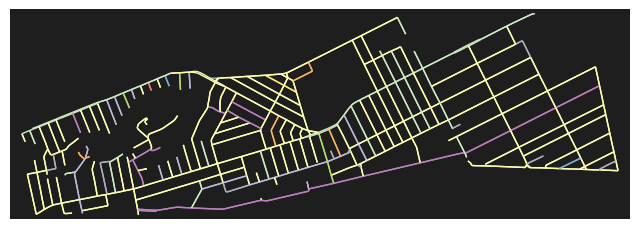

In [188]:
#Plot 
bgcolor = "#1e1e1e"
map_fig, map_ax = ox.plot_graph(kensington_graph, node_size=0,
                                dpi=100, bgcolor=bgcolor,
                                save=False, edge_color=kensington_gdf["colour"],
                                edge_linewidth=1, edge_alpha=1)
# Can add show=False later 

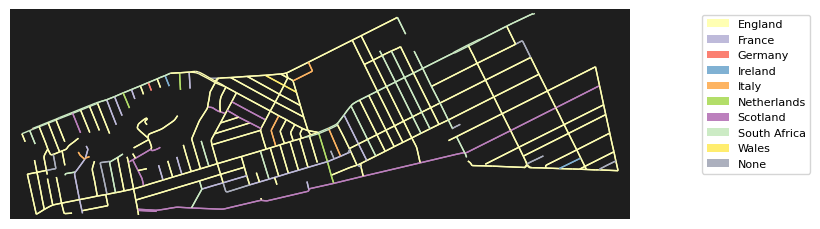

In [193]:
# Custom legend
from matplotlib.patches import Patch

origins_in_fig = kensington_gdf["origin"].unique()

legend_elements = []
for origin in colour_mapper:
    if origin in origins_in_fig:
        legend_elements.append(Patch(facecolor=colour_mapper[origin], label=str(origin).replace('_', ' ').title()))
legend_elements.append(Patch(facecolor=DEFAULT_COLOUR, label="None"))

map_ax.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1), fontsize=8)
map_fig

In [190]:
map_fig.savefig("./output/images/kensington.png", dpi=300, bbox_inches='tight', format="png",
                facecolor=map_fig.get_facecolor(), transparent=False)

# Sandhurst

In [ ]:
sandhurst_graph = ox.graph_from_place('Melville, City of Johannesburg, South Africa', network_type="drive")
ox.plot_graph(sandhurst_graph)

# Johannesburg

In [ ]:
johannesburg_graph = ox.graph_from_place('City of Johannesburg, South Africa', network_type="drive")
ox.plot_graph(johannesburg_graph)

In [ ]:
johannesburg_gdf = ox.graph_to_gdfs(johannesburg_graph, nodes=False)
print(len(johannesburg_gdf))
johannesburg_gdf.head()